# Problema 3


In [1]:
import numpy as np
from math import exp, factorial, inf
from matplotlib import pyplot as plt
from collections import defaultdict


class MontanaRusa():

    def __init__(self, nombre, tasa):
        self.nombre = nombre
        self.tasa = tasa  # x personas/segundo
        # Un diccionario de la forma {tiempo (en segundos): personas llegadas en ese tiempo}
        # útil en caso que se quiera analizar más de un minuto
        self.personas_llegadas = dict()
        self.puntos_obtenidos = dict()

    def personas_llegadas_t_segundos(self, t):
        self.personas_llegadas[t] = sum(np.random.poisson(self.tasa, t))

    def puntos_obtenidos_t_segundos(self, t, puntos):
        self.puntos_obtenidos[t] = sum(np.random.poisson(self.tasa * puntos, t))



# Se define la distribución poisson:
def distribucion_poisson(k, lamb, t, acum=False, graph=False):
    # 'acum' representa si la función es acumulada o no.
    if acum:
        graphics = []
        resultado = 0
        for i in range(k+1):
            resultado += (lamb * t)**i * exp(-lamb*t)/factorial(i)
        # graph representa la función de probabilidad en sí.
        if graph:
            graphics.append((lamb * t)**1 * exp(-lamb*t)/factorial(1))
            i = 2
            while graphics[-1] >= graphics[0]:
                graphics.append((lamb * t)**i * exp(-lamb*t)/factorial(i))
                i += 1
        return resultado, graphics  # Retorna una tupla (valor, función de prob.)
    else:
        resultado = (lamb * t)**k * exp(-lamb*t)/factorial(k)
        return resultado  # Retorna un valor

## Parte 1

### a)

Prob. experimental para +30 personas: 0.8095
Prob. teorica para +30 personas: 0.8142538399635679


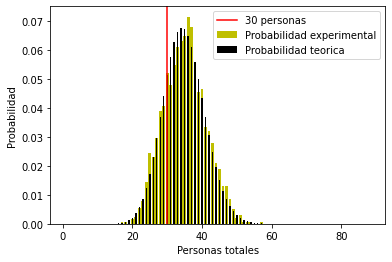

In [2]:
# Se instancian las montañas rusas
raptor = MontanaRusa('Raptor', 0.33)
boomerang = MontanaRusa('Boomerang', 0.25)

probabilidad_exper_parteA = []  # Casos favorables (+30)
total_parteA = defaultdict(int)  # Utilizada para graficar la prob.
proporciones = {'Victorias': [], 'Derrotas': [], 'Empates': []}
# Se realizan 2000 simulaciones
for __ in range(2000):
    raptor.personas_llegadas_t_segundos(60)
    raptor.puntos_obtenidos_t_segundos(60, 4)
    boomerang.personas_llegadas_t_segundos(60)
    boomerang.puntos_obtenidos_t_segundos(60, 5)

    personas_raptor = raptor.personas_llegadas[60]
    personas_boomerang = boomerang.personas_llegadas[60]

    puntos_antonia = raptor.puntos_obtenidos[60]
    puntos_guillermo = boomerang.puntos_obtenidos[60]
    if puntos_antonia > puntos_guillermo:
        proporciones['Victorias'].append('antonia')
        proporciones['Derrotas'].append('guillermo')
    elif puntos_guillermo > puntos_antonia:
        proporciones['Victorias'].append('guillermo')
        proporciones['Derrotas'].append('antonia')
    else:
        proporciones['Empates'].append('empate')

    personas_totales_1_min = personas_boomerang + personas_raptor
    total_parteA[personas_totales_1_min] += 1
    if personas_totales_1_min >= 30:
        probabilidad_exper_parteA.append(personas_totales_1_min)

# Resultados parte a)
print('Prob. experimental para +30 personas:', len(probabilidad_exper_parteA)/2000)
print('Prob. teorica para +30 personas:', (1 - distribucion_poisson(29, 0.25+0.33, 60,\
                                           acum=True)[0]))

plt.bar(np.array(list(total_parteA.keys())), np.array(list(total_parteA.values()))/2000,\
        color='y', label='Probabilidad experimental')
plt.bar(np.linspace(1, 88, 88), distribucion_poisson(29, 0.25+0.33, 60, acum=True, graph=True)[1],\
         width=0.4, color='black', label='Probabilidad teorica')
plt.axvline(x=30, color='r', label='30 personas')
plt.ylabel('Probabilidad')
plt.xlabel('Personas totales')
plt.legend(loc='best')
plt.savefig('P3_1_a.pdf')
plt.show()

### b)

Victorias experimentales de Antonia: 0.6205
Victorias teoricas de Antonia: 0.6171265444336508

Victorias experimentales de Guillermo: 0.3515
Victorias teoricas de Guillermo: 0.35250265675821246

Empates experimentales: 0.028
Empates teóricos: 0.030370798807174772


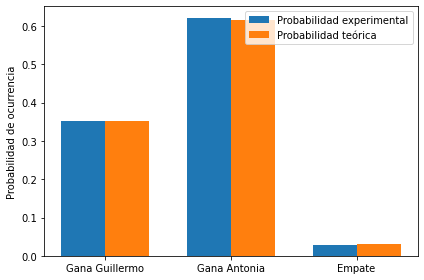

In [3]:
# Resultados parte b)
# Calculo de victorias teoricas
antonia_teor = 0
for i in range(150):
    for j in range(i+1, 150):
        antonia_teor += distribucion_poisson(j, 1.32, 60) * distribucion_poisson(i, 1.25, 60)

guillermo_teor = 0
for i in range(150):
    for j in range(0, i):
        guillermo_teor += distribucion_poisson(j, 1.32, 60) * distribucion_poisson(i, 1.25, 60)

empate_teor = 0
for i in range(150):
    empate_teor += distribucion_poisson(i, 1.32, 60) * distribucion_poisson(i, 1.25, 60)
print('Victorias experimentales de Antonia:', proporciones['Victorias'].count('antonia')/2000)
print('Victorias teoricas de Antonia:', antonia_teor)
print()
print('Victorias experimentales de Guillermo:', proporciones['Victorias'].count('guillermo')/2000)
print('Victorias teoricas de Guillermo:', guillermo_teor)
print()
print('Empates experimentales:', len(proporciones['Empates'])/2000)
print('Empates teóricos:', empate_teor)

labels = ['Gana Guillermo', 'Gana Antonia', 'Empate']
exp_win = [proporciones['Victorias'].count('guillermo')/2000, proporciones['Victorias'].count('antonia')/2000, len(proporciones['Empates'])/2000]
teor_win = [guillermo_teor, antonia_teor, empate_teor]

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, exp_win, width, label='Probabilidad experimental')
rects2 = ax.bar(x + width/2, teor_win, width, label='Probabilidad teórica')
ax.set_ylabel('Probabilidad de ocurrencia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.savefig('P3_1_b.pdf')
plt.show()

### c)

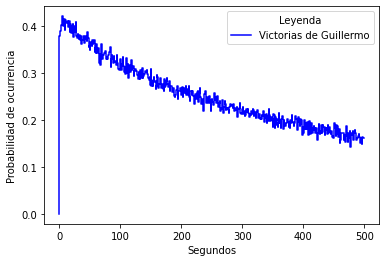

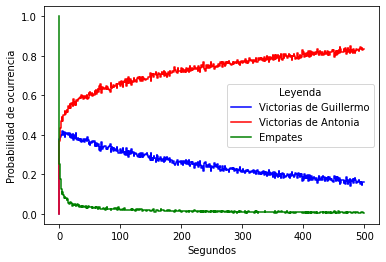

In [4]:
# Resultado parte c)
proporciones_c = defaultdict(list)
for __ in range(2000):  # Demora aprox. 3 mins en ejecutarse
    for segundos in range(500):
        raptor.puntos_obtenidos_t_segundos(segundos, 4)
        boomerang.puntos_obtenidos_t_segundos(segundos, 5)

        puntos_antonia = raptor.puntos_obtenidos[segundos]
        puntos_guillermo = boomerang.puntos_obtenidos[segundos]
        if puntos_guillermo > puntos_antonia:
            proporciones_c['Victorias Guillermo' + str(segundos)].append('guillermo')
        elif puntos_antonia > puntos_guillermo:
            proporciones_c['Victorias Antonia' + str(segundos)].append('antonia')
        else:
            proporciones_c['Empates' + str(segundos)].append('empates')


victorias_guillermo_c = {segundo: proporciones_c['Victorias Guillermo' + str(segundo)].count('guillermo') for segundo in range(500)}
victorias_antonia_c = {segundo: proporciones_c['Victorias Antonia' + str(segundo)].count('antonia') for segundo in range(500)}
empates_c = {segundo: proporciones_c['Empates' + str(segundo)].count('empates') for segundo in range(500)}
x = np.linspace(0, 499, 500)
y_1 = np.array(list(victorias_guillermo_c.values())) / 2000
y_2 = np.array(list(victorias_antonia_c.values())) / 2000
y_3 = np.array(list(empates_c.values())) / 2000

plt.step(x, y_1, color='b', label='Victorias de Guillermo')
plt.ylabel('Probabilidad de ocurrencia')
plt.xlabel('Segundos')
plt.legend(title='Leyenda',loc='best')
plt.savefig('P3_1_c1.pdf')
plt.show()

plt.step(x, y_1, color='b', label='Victorias de Guillermo')
plt.step(x, y_2, color='r', label='Victorias de Antonia')
plt.step(x, y_3, color='g', label='Empates')
plt.ylabel('Probabilidad de ocurrencia')
plt.xlabel('Segundos')
plt.legend(title='Leyenda',loc='best')
plt.savefig('P3_1_c2.pdf')
plt.show()

## Parte 2

### a)

In [5]:
tren_minero = MontanaRusa('Tren Minero', 0.39)  # Se instancia la montaña rusa de Sofia

empates = 0
# Se realizan 3000 simulaciones
for __ in range(3000):
    raptor.puntos_obtenidos_t_segundos(60, 4)
    boomerang.puntos_obtenidos_t_segundos(60, 5)
    tren_minero.puntos_obtenidos_t_segundos(60, 3)

    puntos_antonia = raptor.puntos_obtenidos[60]
    puntos_guillermo = boomerang.puntos_obtenidos[60]
    puntos_sofia = tren_minero.puntos_obtenidos[60]
    
    posibles_empates = [puntos_antonia == puntos_guillermo,
                        puntos_antonia == puntos_sofia,
                        puntos_guillermo == puntos_sofia]
    if any(posibles_empates):
        empates += 1

# Calculo teórico
empate_teor = 0
for i in range(150):
    empate_teor += distribucion_poisson(i, 1.32, 60) * distribucion_poisson(i, 1.25, 60)  # puntos antonia == puntos guillermo
    empate_teor += distribucion_poisson(i, 1.32, 60) * distribucion_poisson(i, 0.39*3, 60)  # puntos antonia == puntos sofia
    empate_teor += distribucion_poisson(i, 1.25, 60) * distribucion_poisson(i, 0.39*3, 60)  # puntos guillermo == puntos sofia

print()
print('Probabilidad teórica de que ocurra algún empate:', empate_teor)
print('Probabilidad experimental de que ocurra algún empate:', empates/3000)


Probabilidad teórica de que ocurra algún empate: 0.08591353258271948
Probabilidad experimental de que ocurra algún empate: 0.08


## Parte 3

### b)

Probabilidad de victoria de Antonia: 0.542
Probabilidad de victoria de Guillermo: 0.252
Probabilidad de victoria de Sofia: 0.10333333333333333
Probabilidad de que ocurra algún empate: 0.10266666666666667

Prob. puntos > 50 en 90s - Antonia: 1.0
Prob. puntos > 50 en 90s - Guillermo: 1.0
Prob. puntos > 50 en 90s - Sofia: 1.0


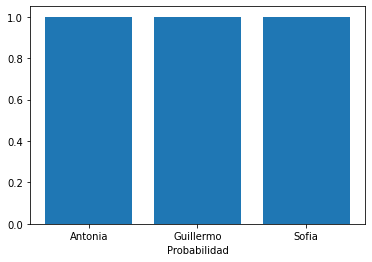

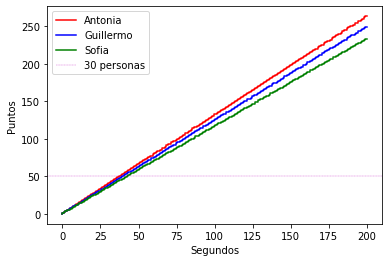

In [6]:
puntos_antonia_xseg = defaultdict(int)
puntos_guillermo_xseg = defaultdict(int)
puntos_sofia_xseg = defaultdict(int)

probabilidad_50_antonia = 0
probabilidad_50_guillermo = 0
probabilidad_50_sofia = 0

victorias_c = []
# Se realizan 3000 simulaciones
for __ in range(3000):
    finalizador = False
    # Para 200 segundos
    for segundos in range(200):
        raptor.puntos_obtenidos_t_segundos(segundos, 4)
        boomerang.puntos_obtenidos_t_segundos(segundos, 5)
        tren_minero.puntos_obtenidos_t_segundos(segundos, 3)

        puntos_antonia = raptor.puntos_obtenidos[segundos]
        puntos_guillermo = boomerang.puntos_obtenidos[segundos]
        puntos_sofia = tren_minero.puntos_obtenidos[segundos]

        # Utilizados para graficar
        puntos_antonia_xseg[segundos] += puntos_antonia
        puntos_guillermo_xseg[segundos] += puntos_guillermo
        puntos_sofia_xseg[segundos] += puntos_sofia
        
        # Se encarga de comprobar quien llega primero a 50 puntos
        if (puntos_antonia >= 50 or puntos_guillermo >= 50 or puntos_sofia >= 50) and not finalizador:
            if puntos_antonia >= 50 and puntos_guillermo < 50 and puntos_sofia < 50:
                victorias_c.append('antonia') 
            elif puntos_guillermo >= 50 and puntos_antonia < 50 and puntos_sofia < 50:
                victorias_c.append('guillermo')
            elif puntos_sofia >= 50 and puntos_guillermo < 50 and puntos_antonia < 50:
                victorias_c.append('sofia')
            else:
                victorias_c.append('empate')
            finalizador = True
        
        # Se encarga de la probabilidad de obtener mas de 50 puntos en 90 seg. por cada jugador
        if segundos == 90:
            # Se consideran solo sobre 50 puntos, no exactos 50
            if puntos_antonia > 50:
                probabilidad_50_antonia += 1
            if puntos_guillermo > 50:
                probabilidad_50_guillermo += 1
            if puntos_sofia > 50:
                probabilidad_50_sofia += 1

print('Probabilidad de victoria de Antonia:', victorias_c.count('antonia') / 3000)
print('Probabilidad de victoria de Guillermo:', victorias_c.count('guillermo') / 3000)
print('Probabilidad de victoria de Sofia:', victorias_c.count('sofia') / 3000)
print('Probabilidad de que ocurra algún empate:', victorias_c.count('empate') / 3000)
print()
print('Prob. puntos > 50 en 90s - Antonia:', probabilidad_50_antonia / 3000)
print('Prob. puntos > 50 en 90s - Guillermo:', probabilidad_50_guillermo / 3000)
print('Prob. puntos > 50 en 90s - Sofia:', probabilidad_50_sofia / 3000)


plt.bar(['Antonia', 'Guillermo', 'Sofia'],
        np.array([probabilidad_50_antonia, probabilidad_50_guillermo, probabilidad_50_sofia])/3000)
plt.xlabel('Probabilidad')
plt.savefig('P3_3_a1.pdf')
plt.show()

x = np.linspace(0, 200, 200)
plt.step(x, np.array(list(puntos_antonia_xseg.values())) / 3000, label='Antonia', color='r')
plt.step(x, np.array(list(puntos_guillermo_xseg.values())) / 3000, label='Guillermo', color='b')
plt.step(x, np.array(list(puntos_sofia_xseg.values())) / 3000, label='Sofia', color='g')
plt.axhline(y=50, color='m', label='30 personas', ls='--', lw=0.3)
plt.ylabel('Puntos')
plt.xlabel('Segundos')
plt.legend(loc='best')
plt.savefig('P3_3_a2.pdf')
plt.show()